Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
[0, 1]
[np.int64(268471), np.int64(26472)]
        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
313011             1  27.41        1                0       0             7.0   
313012           

C:\Users\Dell\AppData\Local\Temp\ipykernel_18008\2653576973.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18008\2653576973.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])


disease HeartDisease
0    268471
1     26472
Name: count, dtype: int64
no disease HeartDisease
0    268471
1     26472
Name: count, dtype: int64
disease        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                 0  16.60        1                0       0             3.0   
1                 0  20.34        0                0       1             0.0   
2                 0  26.58        1                0       0            20.0   
3                 0  24.21        0                0       0             0.0   
4                 0  23.71        0                0       0            28.0   
...             ...    ...      ...              ...     ...             ...   
29199             0  20.12        0                0       0             0.0   
29200             0  25.84        1                0       1             0.0   
29201             0  25.10        1                0       0             0.0   
29202             0  27.50        1            

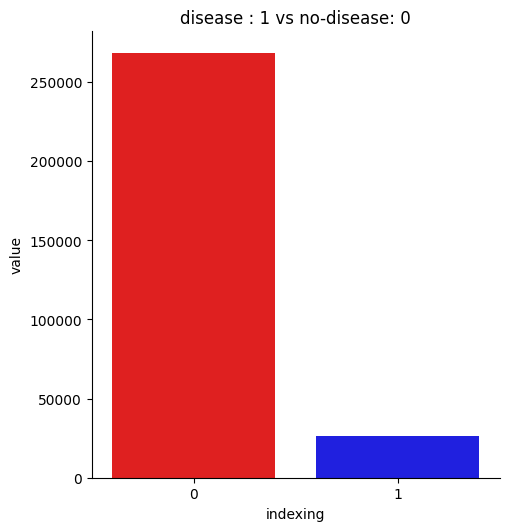

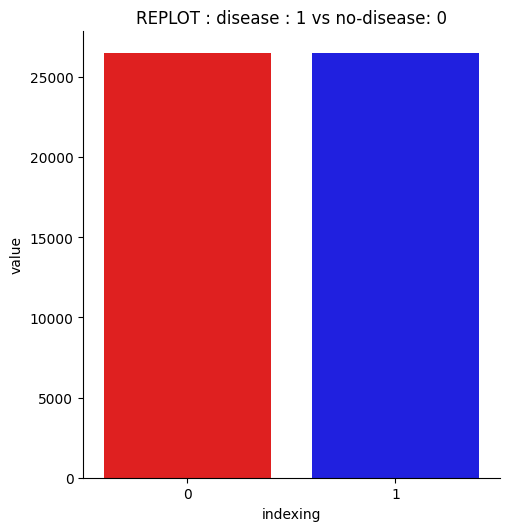

In [8]:
import pandas as pd

df = pd.read_csv("heart_2020.csv", on_bad_lines='skip')
df.head()
df.shape

#checking nan and dublicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(df.columns)
#encoding of data
df.drop('Diabetic',inplace=True ,axis=1)
cols = ['HeartDisease','AlcoholDrinking','Smoking','Asthma','DiffWalking','Stroke','PhysicalActivity','KidneyDisease','SkinCancer']

for col in cols:
    # strip spaces, lowercase
    df[col] = df[col].astype(str).str.strip().str.lower()
    
    
    # replace common variations for 'no'
    df[col] = df[col].replace(['no borderline diabetes'], 'no')
    
    # map yes/no to 1/0
    df[col] = df[col].map({'yes':1, 'no':0})


#check balancing of data

disease = df['HeartDisease'].value_counts()
no_disease = df['HeartDisease'].value_counts()

#plotting disease and no disease

import matplotlib.pyplot as plt

indexing=list( df['HeartDisease'].value_counts().keys())
value=list(df['HeartDisease'].value_counts().values)
print(indexing)
print(value)
print(df)


import seaborn as sbn
import matplotlib.pyplot as plt

sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])
plt.title("disease : 1 vs no-disease: 0")
plt.xlabel("indexing")
plt.ylabel("value")

print("disease" ,disease)
print("no disease" ,no_disease)

  # ........................................................................

#need to balance the data

disease =df[df['HeartDisease']==0].iloc[0:26500]
no_disease=df[df['HeartDisease']==1]

df=pd.concat([disease,no_disease])


#reploting 

indexing=list( df['HeartDisease'].value_counts().keys())
value=list(df['HeartDisease'].value_counts().values)

sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])
plt.title("REPLOT : disease : 1 vs no-disease: 0")
plt.xlabel("indexing")
plt.ylabel("value")

print("disease" ,disease)
print("no disease" ,no_disease)


#..............................................................................
#splitting data

from sklearn.model_selection import train_test_split

x=df.drop('HeartDisease', axis=1) #independent
y=df['HeartDisease']

# target is to check disease or no disease

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

x_train.shape,y_train.shape,y_test.shape,x_test.shape

#using dl. creating layers

import tensorflow as tf

# tf.

In [9]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312986,1,38.45,0,0,1,30.0,15.0,1,Female,55-59,Hispanic,1,Poor,6.0,1,0,0
312988,1,36.21,1,0,0,0.0,0.0,1,Female,75-79,Hispanic,1,Good,8.0,0,0,0
313002,1,37.12,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,1,Very good,7.0,0,0,0
313007,1,33.20,1,0,0,0.0,0.0,0,Female,60-64,Hispanic,1,Very good,8.0,1,0,0


In [10]:
import tensorflow as tf


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

#creating input layer

x.shapex
input_x=x.shape[1]

#input
model.add(Dense(units=64,activation='relu',input_dim=input_x))

#hidden
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))

#output
model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()






AttributeError: 'DataFrame' object has no attribute 'shapex'

In [ ]:
x_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24721,25.62,No,0,0,0.0,0.0,No,Male,50-54,White,1,Very good,7.0,No,0,0
22728,49.92,Yes,0,0,0.0,0.0,Yes,Male,60-64,Black,1,Good,8.0,Yes,0,0
249804,23.06,No,0,0,0.0,0.0,No,Male,70-74,White,1,Very good,8.0,No,0,0
8521,26.15,Yes,0,0,0.0,20.0,No,Male,70-74,White,1,Good,8.0,No,0,0
116559,27.46,No,0,0,0.0,0.0,No,Female,70-74,White,1,Excellent,8.0,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,30.18,Yes,0,0,0.0,4.0,No,Female,30-34,White,1,Very good,6.0,No,0,0
216558,29.18,Yes,0,0,0.0,0.0,Yes,Male,60-64,White,0,Fair,8.0,No,1,0
136135,23.59,No,0,0,2.0,0.0,No,Female,80 or older,White,1,Good,6.0,No,0,0
1014,35.71,No,0,0,0.0,20.0,No,Female,45-49,White,0,Very good,6.0,No,0,0


In [ ]:
x.shape
history=model.fit(x_train,y_train,epochs=5,batch_size=32)
y_train


ValueError: could not convert string to float: ' No     '